In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Read the menu.csv file
menu_df = pd.read_csv('menu.csv')

# Select specific columns
selected_columns = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 
                     'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                     'Calcium (% Daily Value)', 'Iron (% Daily Value)']

menu_selected_df = menu_df[selected_columns]
menu_selected_df.head()

,Calories,Total Fat,Carbohydrates,Dietary Fiber,Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,13.0,31,4,3,17,10,0,25,15
1,250,8.0,30,4,3,18,6,0,25,8
2,370,23.0,29,4,2,14,8,0,25,10
3,450,28.0,30,4,2,21,15,0,30,15
4,400,23.0,30,4,2,21,6,0,25,10


In [19]:
# Display statistical facts for all columns
statistics_df = menu_selected_df.describe()

# Display maximum value for all columns
max_values = menu_selected_df.max()

# Print the statistical facts
print("Statistical Facts:")
print(statistics_df)

# Print the maximum values
print("\nMaximum Values:")
print(max_values)

Statistical Facts:
          Calories   Total Fat  Carbohydrates  Dietary Fiber      Sugars  \
count   260.000000  260.000000     260.000000     260.000000  260.000000   
mean    368.269231   14.165385      47.346154       1.630769   29.423077   
std     240.269886   14.205998      28.252232       1.567717   28.679797   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%     210.000000    2.375000      30.000000       0.000000    5.750000   
50%     340.000000   11.000000      44.000000       1.000000   17.500000   
75%     500.000000   22.250000      60.000000       3.000000   48.000000   
max    1880.000000  118.000000     141.000000       7.000000  128.000000   

          Protein  Vitamin A (% Daily Value)  Vitamin C (% Daily Value)  \
count  260.000000                 260.000000                 260.000000   
mean    13.338462                  13.426923                   8.534615   
std     11.426146                  24.366381                  26.345542

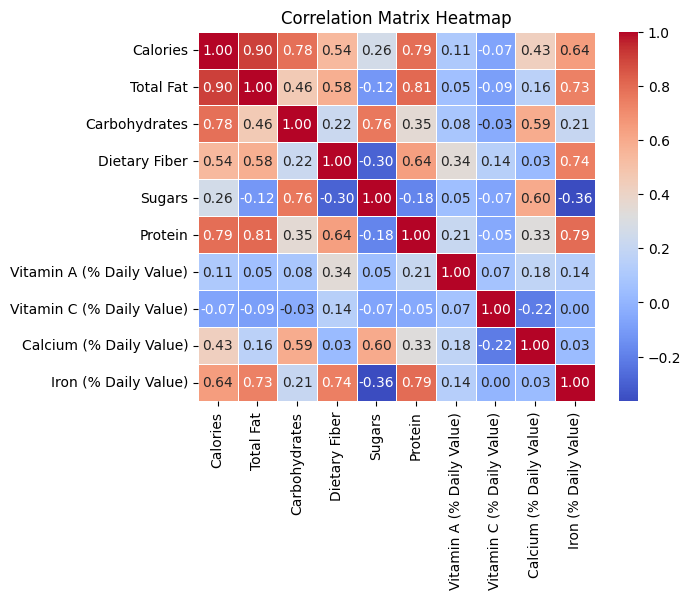

In [20]:
# Calculate correlation matrix
correlation_matrix = menu_selected_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

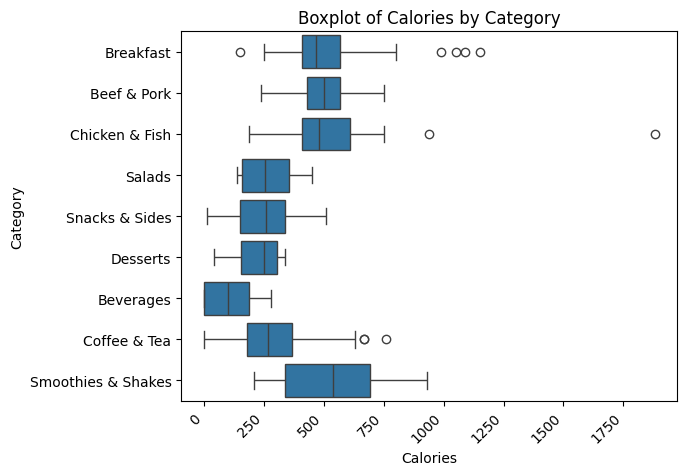

In [21]:
# Draw a boxplot for 'Calories' vs 'Category'
sns.boxplot(x='Calories', y='Category', data=menu_df)
plt.title('Boxplot of Calories by Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [22]:
# Select specific columns
selected_columns = ['Item', 'Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 
                     'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                     'Calcium (% Daily Value)', 'Iron (% Daily Value)']

menu_selected_df = menu_df[selected_columns]

# Find the item with the highest quantity for each category
for column in selected_columns[1:]:
    max_item = menu_selected_df.loc[menu_selected_df[column].idxmax()]['Item']
    max_value = menu_selected_df[column].max()
    print(f"{column}: {max_item} - {max_value}")

Calories: Chicken McNuggets (40 piece) - 1880
Total Fat: Chicken McNuggets (40 piece) - 118.0
Carbohydrates: Chocolate Shake (Large) - 141
Dietary Fiber: Big Breakfast with Hotcakes (Large Biscuit) - 7
Sugars: McFlurry with M&M’s Candies (Medium) - 128
Protein: Chicken McNuggets (40 piece) - 87
Vitamin A (% Daily Value): Premium Bacon Ranch Salad (without Chicken) - 170
Vitamin C (% Daily Value): Minute Maid Orange Juice (Large) - 240
Calcium (% Daily Value): Strawberry Shake (Large) - 70
Iron (% Daily Value): Big Breakfast with Hotcakes (Regular Biscuit) - 40


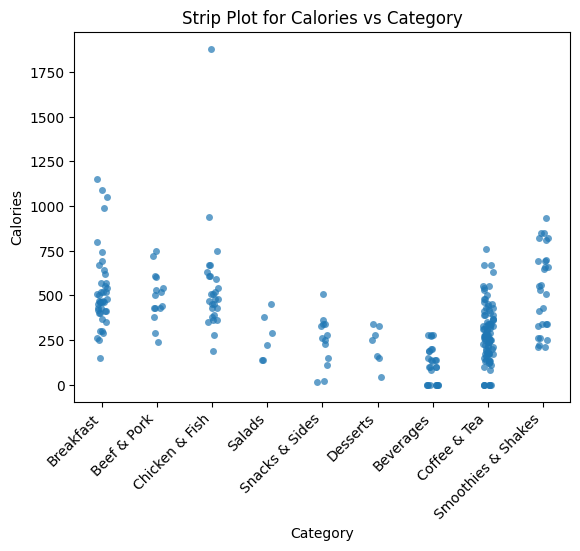

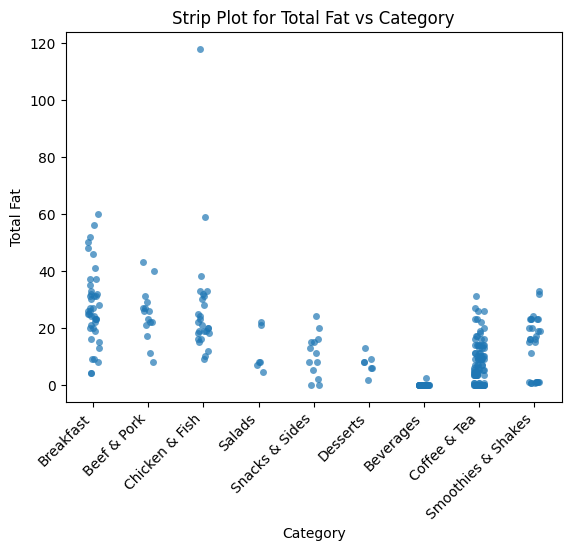

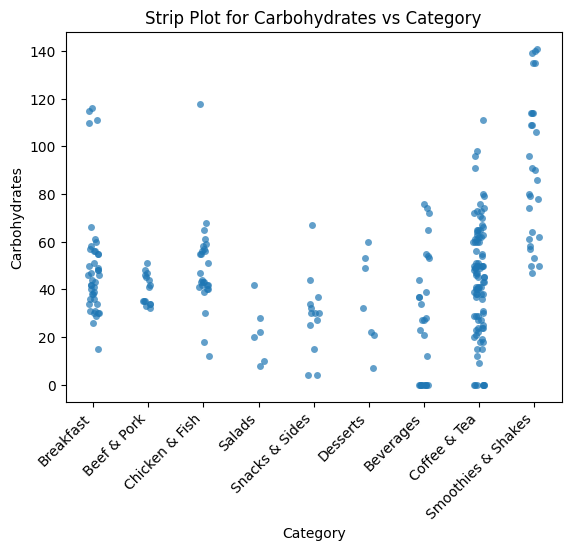

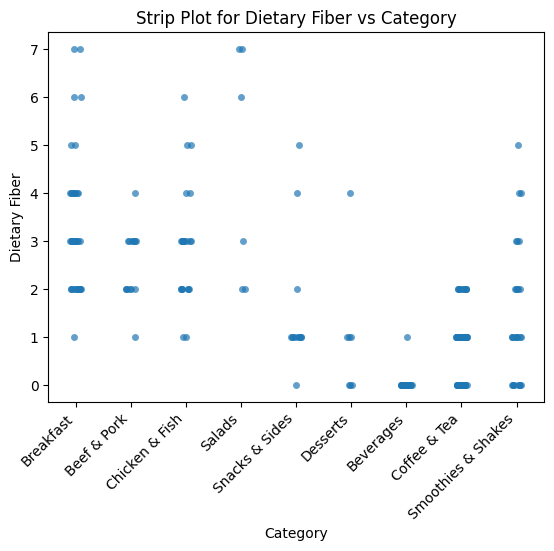

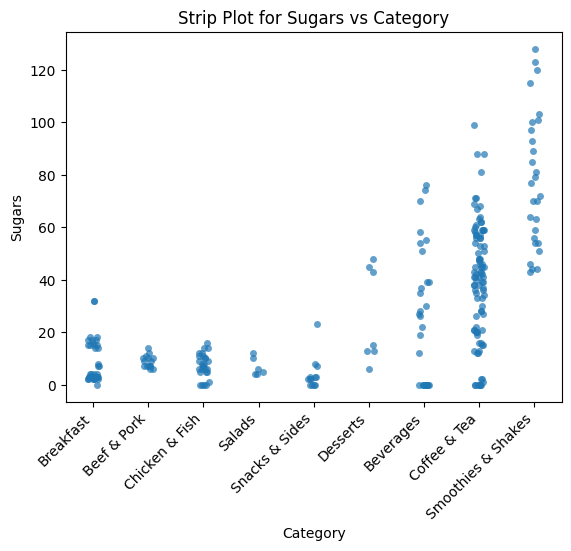

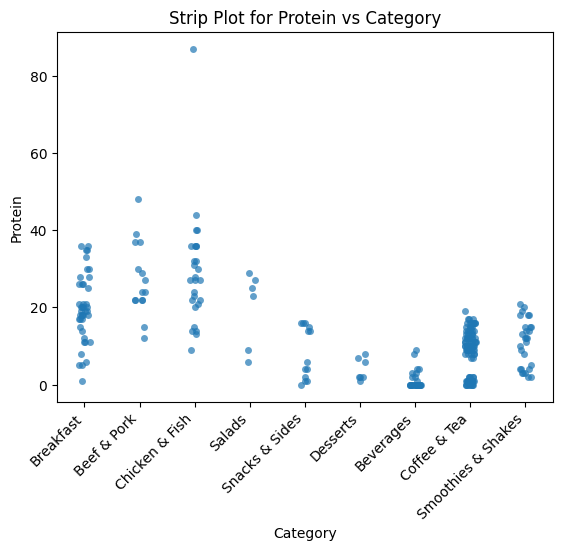

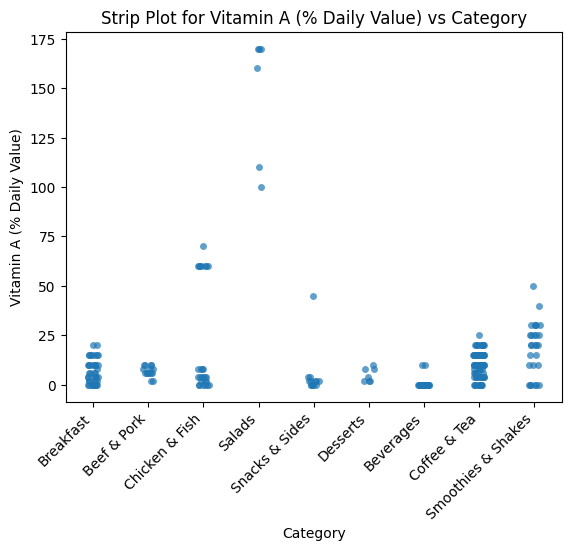

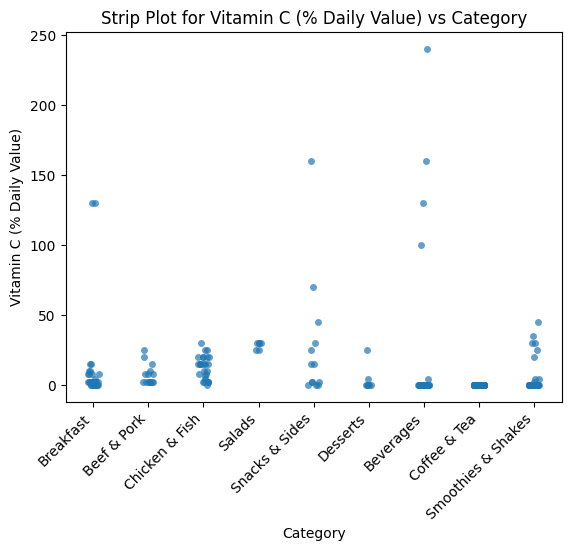

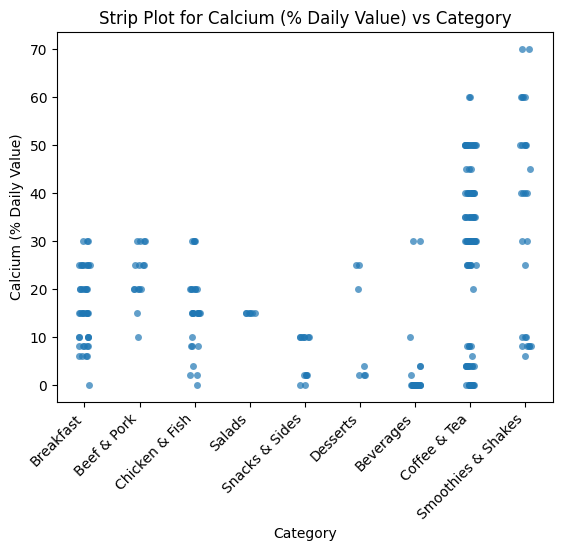

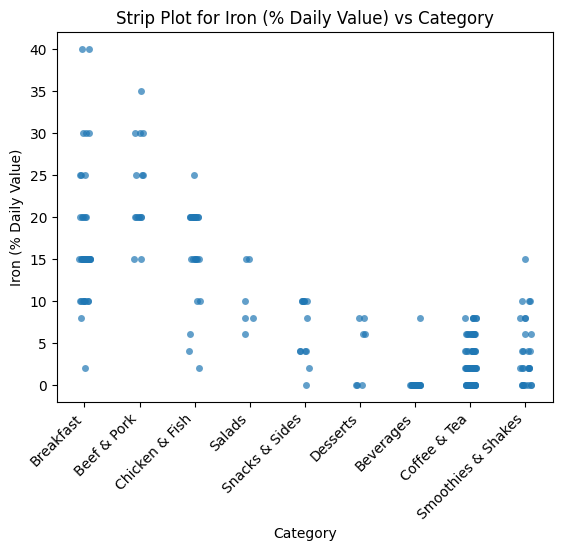

In [26]:
# Select specific columns
selected_columns = ['Calories', 'Total Fat', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 
                     'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
                     'Calcium (% Daily Value)', 'Iron (% Daily Value)']

for column in selected_columns:
    # Draw a strip plot for 'Calories' vs 'Category'
    sns.stripplot(x='Category', y=column, data=menu_df, jitter=True, marker='o', alpha=0.7)
    plt.title(f'Strip Plot for {column} vs Category')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()



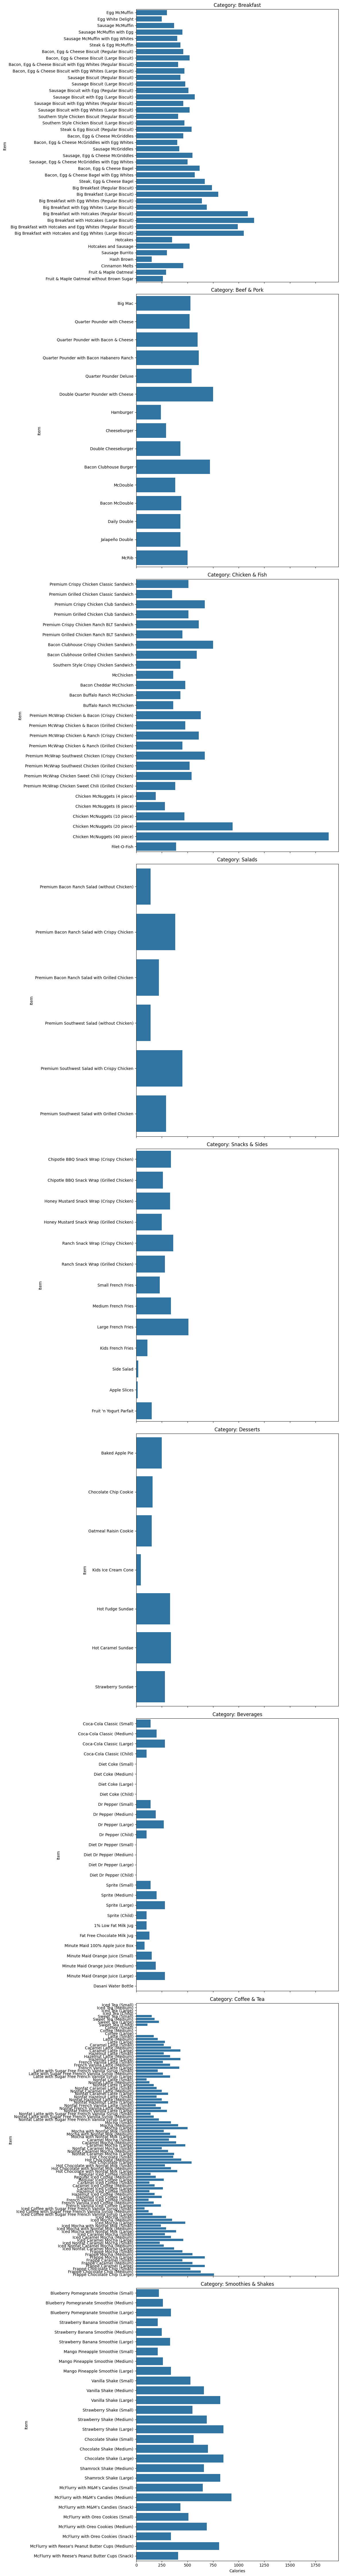

In [31]:
# Select specific columns
selected_columns = ['Item', 'Category', 'Calories']

# Get unique categories
categories = menu_df['Category'].unique()

# Create subplots for each category
fig, axes = plt.subplots(len(categories), 1, figsize=(12, 10 * len(categories)), sharex=True)

# Draw a horizontal bar graph for items in each category against calories
for i, category in enumerate(categories):
    category_df = menu_df[menu_df['Category'] == category]
    sns.barplot(ax=axes[i], x='Calories', y='Item', data=category_df, dodge=True)
    axes[i].set_title(f'Category: {category}')
    axes[i].set_xlabel('Calories')

plt.tight_layout()
plt.show()
